# Image Data Augmentation using Generators 

This code is heavily borrowed [from here](https://fairyonice.github.io/Learn-about-ImageDataGenerator.html).

Please also refer to [Keras tutorial on image data augmentation](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html)

# Setup

## Some config

In [ ]:
#an image of a chameleon
IMAGE_URL = 'https://raw.githubusercontent.com/ne1s0n/coding_excercises/master/data/800px-Panther_chameleon_(Furcifer_pardalis)_male_Nosy_Be.jpg'

#where to save it, locally
IMG_FILENAME = '/content/cham.jpg'

#where to create the augmented data
DIR_AUGMENTED_DATA = '/content/augmented/'

## Support function

The next code block defines a function that:

* receives in input a [ImageDataGenerator](https://keras.io/api/preprocessing/image/#imagedatagenerator-class) instance and an image (read via [Keras load_img function](https://keras.io/api/preprocessing/image/#loadimg-function))
* invokes the generator on the image via the [.flow()](https://keras.io/api/preprocessing/image/#flow-method) method
* plots the original image alongside the augmented versions

In [ ]:
import os 
from keras.preprocessing.image import ImageDataGenerator,  img_to_array, load_img
from matplotlib import pyplot as plt

def generate_plot_pics(datagen,orig_img, dir_augmented_data=DIR_AUGMENTED_DATA):
    try:
        ## if the preview folder does not exist, create
        os.mkdir(dir_augmented_data)
    except:
        ## if the preview folder exists, then remove
        ## the contents (pictures) in the folder
        for item in os.listdir(dir_augmented_data):
            os.remove(dir_augmented_data + "/" + item)

    ## convert the original image to array
    x = img_to_array(orig_img)
    ## reshape (Sample, Nrow, Ncol, 3) 3 = R, G or B
    x = x.reshape((1,) + x.shape)
    ## -------------------------- ##
    ## randomly generate pictures
    ## -------------------------- ##
    i = 0
    Nplot = 8
    for batch in datagen.flow(x,batch_size=1,
                          save_to_dir=dir_augmented_data,
                          save_prefix="pic",
                          save_format='jpeg'):
        i += 1
        if i > Nplot - 1: ## generate 8 pictures 
            break

    ## -------------------------- ##
    ##   plot the generated data
    ## -------------------------- ##
    fig = plt.figure(figsize=(8, 6))
    fig.subplots_adjust(hspace=0.02,wspace=0.01,
                    left=0,right=1,bottom=0, top=1)

    ## original picture, in position one
    ax = fig.add_subplot(3, 3, 1,xticks=[],yticks=[])        
    ax.imshow(orig_img)
    ax.set_title("original")

    #from position two all the augmented images
    i = 2
    for imgnm in os.listdir(dir_augmented_data):
        ax = fig.add_subplot(3, 3, i,xticks=[],yticks=[]) 
        img = load_img(dir_augmented_data + "/" + imgnm)
        ax.imshow(img)
        i += 1
    plt.show()

# Download the data

We use the [requests module](https://requests.readthedocs.io/en/master/) to download the image from a web url to a local directory.

In [ ]:
import requests

#let's create a response object...
response = requests.get(IMAGE_URL, stream=True)

#...and do a little check on the available meta-data
print(response.status_code)
print(response.headers['content-type'])
print(response.url)

200
image/jpeg
https://raw.githubusercontent.com/ne1s0n/coding_excercises/master/data/800px-Panther_chameleon_(Furcifer_pardalis)_male_Nosy_Be.jpg


If all went well we should see a 200 status code (= OK). If you see something different (especially codes starting with a 4, such as 404) something bad may have happened and you may want to check the list of [HTTP status codes](https://en.wikipedia.org/wiki/List_of_HTTP_status_codes).

It's now time to write the data to local storage.

In [ ]:
with open(IMG_FILENAME, 'wb') as f:
  #the actual data payload is accessed via .content field
  f.write(response.content)

We can now finally load the data via Keras (it actually returns [a PIL object](https://pillow.readthedocs.io/en/3.0.x/handbook/tutorial.html)):

In [ ]:
orig_img = load_img(IMG_FILENAME)

# Data augmentations

## Flips

We instantiate an ImageDataGenerator object with only two active transformations: flips. Feel free to deactivate one (or both) 


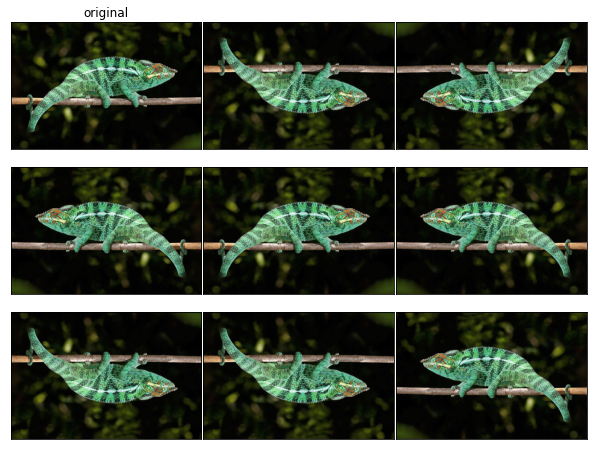

In [ ]:
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
generate_plot_pics(datagen,orig_img)

## Height shift - fill: constant

The image is shifted vertically by a fraction of the height, specified via the parameter `height_shift_range`:

* if in [0, 1] : fraction of the image (e.g. 0.3 -> maximum shift in [-30%, +30%] of the image height)
* if > 1 : amount of pixels to shift (e.g. 60 -> maximum shift of [-60, +60] pixels)

There is an equivalent for horizonal shift, called `width_shift_range`.

There are four modes for filling the new area: "constant", "nearest", "reflect" or "wrap". In "constant" mode the new area is filled with black pixels (or a grey tone, specified via `cval`).

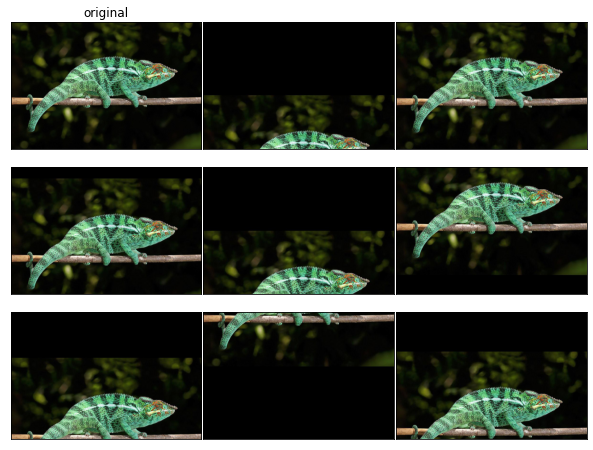

In [ ]:
datagen = ImageDataGenerator(height_shift_range=0.6,fill_mode="constant")
generate_plot_pics(datagen,orig_img)

## Height shift - fill: nearest

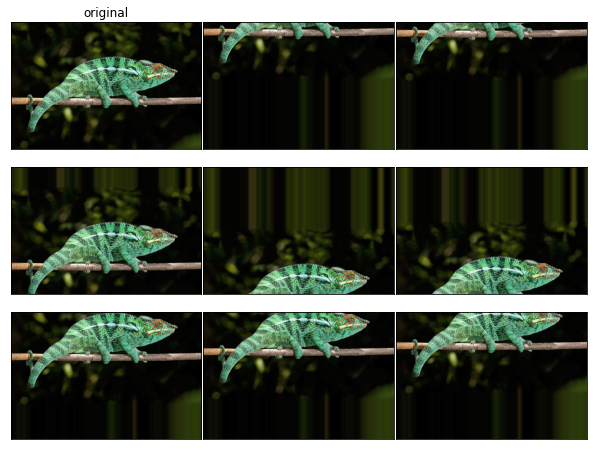

In [ ]:
datagen = ImageDataGenerator(height_shift_range=0.6,fill_mode="nearest")
generate_plot_pics(datagen,orig_img)

## Height shift - fill: reflect

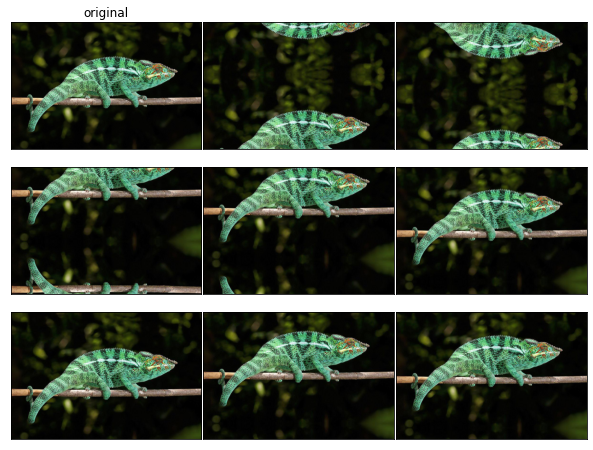

In [ ]:
datagen = ImageDataGenerator(height_shift_range=0.6,fill_mode="reflect")
generate_plot_pics(datagen,orig_img)

## Height shift - fill: wrap

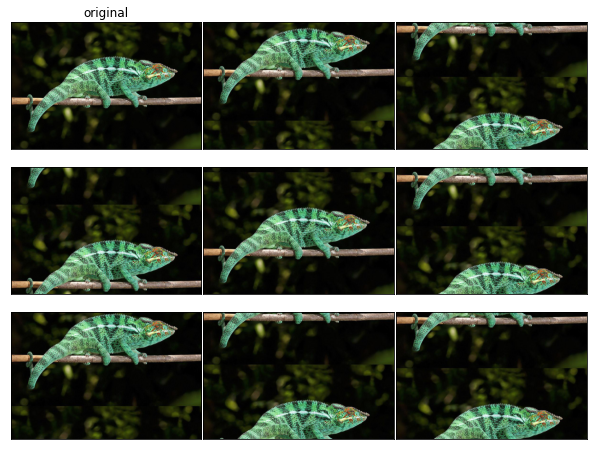

In [ ]:
datagen = ImageDataGenerator(height_shift_range=0.6,fill_mode="wrap")
generate_plot_pics(datagen,orig_img)

## Rotation

Can you guess the default fill mode?

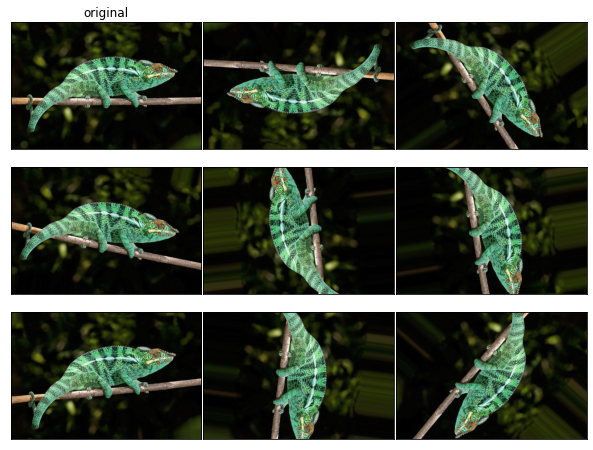

In [ ]:
# rotation_range: Int. Degree range for random rotations.
datagen = ImageDataGenerator(rotation_range=180)
generate_plot_pics(datagen,orig_img)

## Shear

Shear takes an image like this:

```
+---------+
|         |
+---------+
```
and makes it look like this:

```
  +---------+
 /         /
+---------+
```
(plus an extra rotation to keep the most of it into the image boundary)

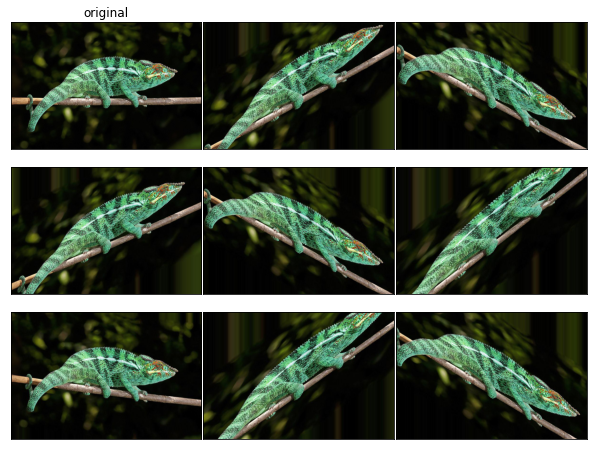

In [ ]:
# shear_range, in degrees (0-360). Here we show an extreme example
datagen = ImageDataGenerator(shear_range=60)
generate_plot_pics(datagen,orig_img)

## Zoom

Random zoom in the [1-zoom_range, 1+zoom_range] interval. Can be different in the x/y axis.

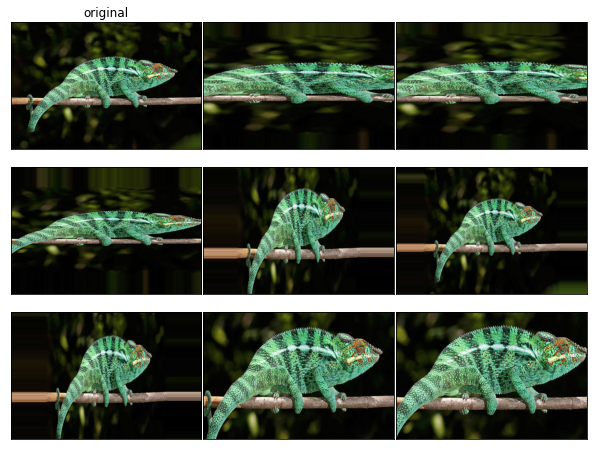

In [ ]:
datagen = ImageDataGenerator(zoom_range=0.6)
generate_plot_pics(datagen,orig_img)

## Brightness adjust: lighter

Values less than 1.0 darken the image, e.g. [0.5, 1.0], whereas values larger than 1.0 brighten the image, e.g. [1.0, 1.5], where 1.0 has no effect on brightness.

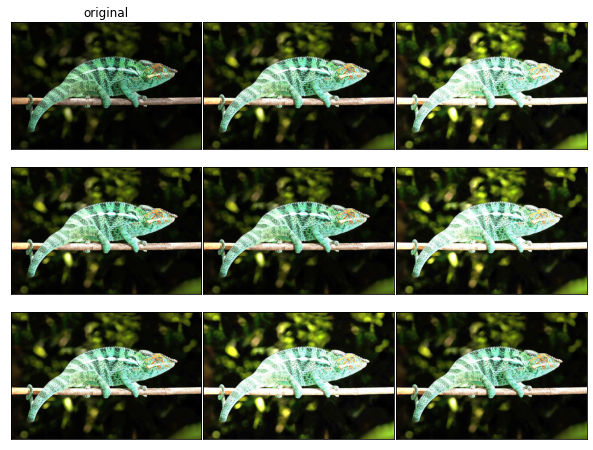

In [ ]:
datagen = ImageDataGenerator(brightness_range=[1.0, 3.0])
generate_plot_pics(datagen,orig_img)

## Brightness adjust: darker

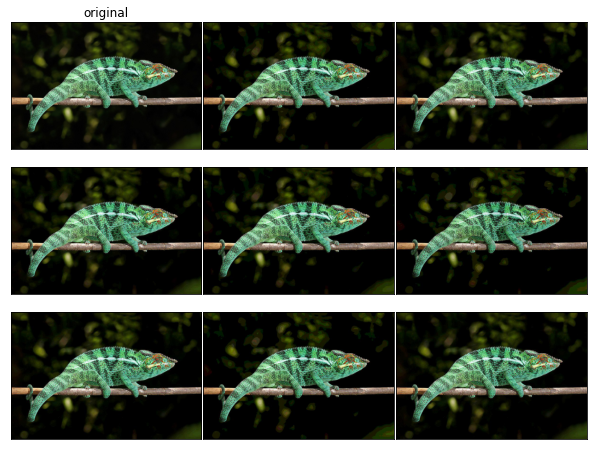

In [ ]:
datagen = ImageDataGenerator(brightness_range=[0.0, 0.2])
generate_plot_pics(datagen,orig_img)

# Exercise: putting all together

It's now time to put all the previous calls together.

**ASSIGNMENT**: instantiate an [ImagedDataGenerator](https://keras.io/api/preprocessing/image/#imagedatagenerator-class) that activates all the image transformations described above (flip, shift, rotation, shear, zoom, brightness change).

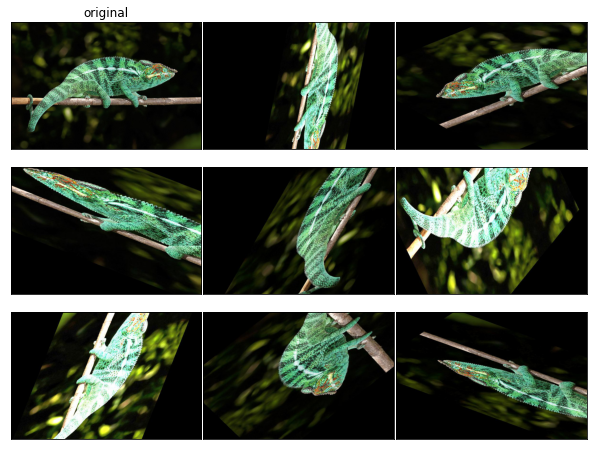

In [ ]:
######## YOUR CODE HERE ########
datagen = ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode="constant",
    height_shift_range=0.2,
    width_shift_range = 0.2,
    rotation_range=180,
    shear_range=60,
    zoom_range=0.6,
    brightness_range=[0.1, 3.0])
generate_plot_pics(datagen,orig_img)
################################